In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys 
import configparser
import pandas as pd 
import numpy as np

from os.path import join as oj
sys.path.insert(0, "../src")
import severson_data
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
font_small = 20
font_xsmall = 15
font_medium = 25
font_large = 30

In [8]:
config = configparser.ConfigParser()
config.read('../config.ini');
result_path =config['PATHS']['result_path'] 

# load data

In [9]:
if 'data_dict' not in locals(): # just takes a lot of time
    data_path = config['DATASET']['severson_path'] 
    bat_dicts = severson_data.load_data_single(data_path)

data_dict = {**bat_dicts[0],  **bat_dicts[2],} # first batch is not aged, third batch is aged for appox 1 year

In [10]:
in_situ_dir = oj(os.path.split(data_path)[0], "in-situ")
filename =[x for x in os.listdir(in_situ_dir) if "csv" in x][0]
pd_csv = pd.read_csv(oj(in_situ_dir, filename),sep = ';', decimal=",")
ref_val = np.asarray(pd_csv.Voltage).mean() 

In [35]:
x, y, coloumbic_eff, list_of_keys, charge_policy,x_discharge, overpot_charge, overpot_discharge =  severson_data.get_data(data_dict, ref_val,num_offset=0, )


69


# bats


In [12]:
voltage, capacity = severson_data.get_capacity_curve(data_dict['b3c7'], 500, is_discharge=True)
my_df= pd.DataFrame(np.stack([voltage, capacity]).T,


                           columns=['Voltage', 'Q', ])
my_df.to_csv(oj(result_path,"b3c7_discharge_curve.csv"), index = False)

In [13]:
np.quantile(y, 1/3)

815.0

In [14]:
np.quantile(y, 2/3)

1010.6666666666666

In [15]:
non_aged_cells= ['2017-05-12-b1c20','2017-05-12-b1c17','2017-05-12-b1c4' ] # from short to long lived
aged_cells = ['2018-04-12-b3c28','2018-04-12-b3c0','2018-04-12-b3c7' ]

In [16]:
non_aged_cells= ['b1c20','b1c17','b1c4' ] # from short to long lived
aged_cells = ['b3c28','b3c0','b3c7' ]

In [20]:
import matplotlib.pyplot as plt

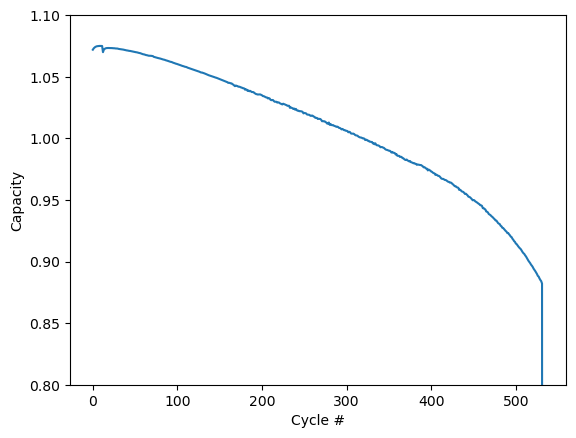

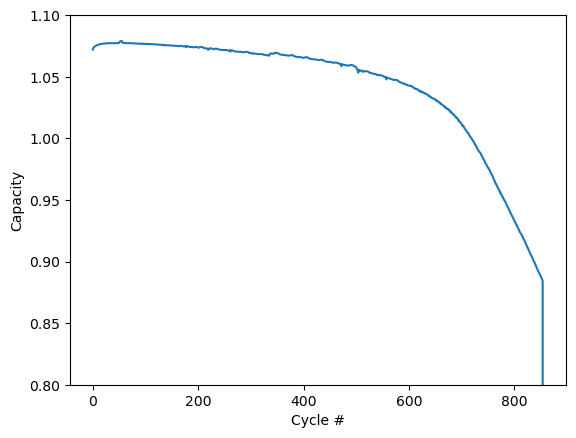

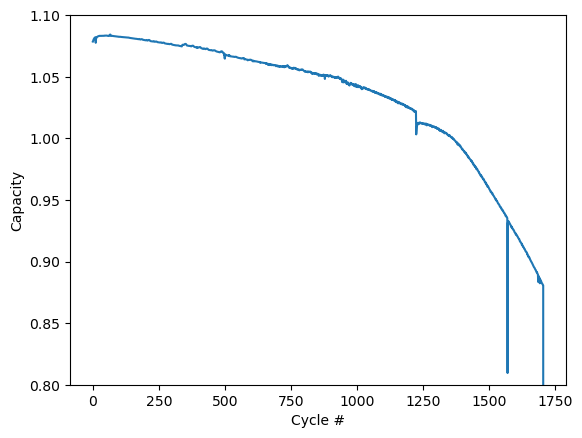

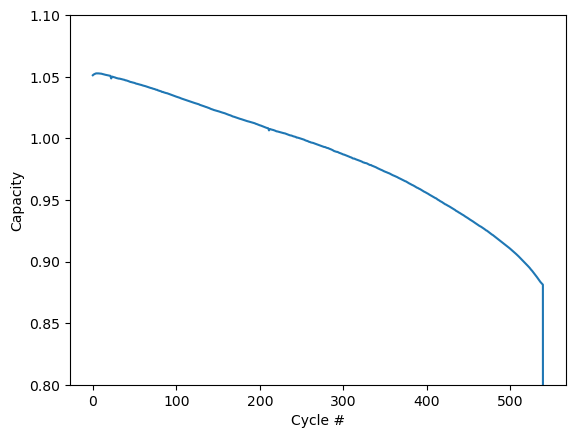

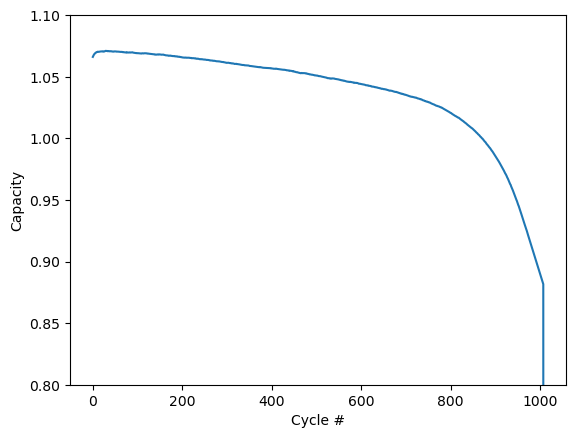

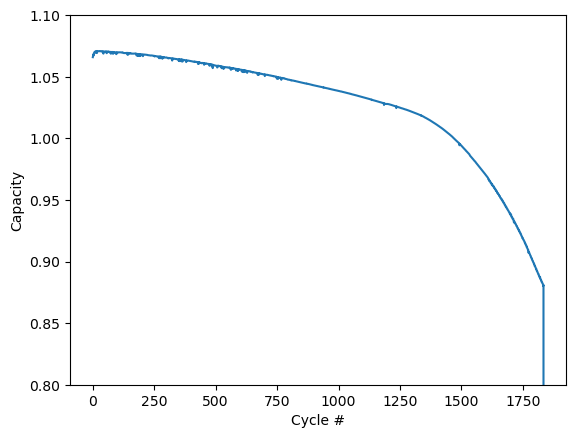

In [52]:
# cut_offs = [500,535,862,2237]
# batch_cuts = [0,len(batch1),len(batch1) + len(batch3)]
idxs = -np.ones((2,3)).astype(np.int32)
# for j in range(2):
#     for i in range(3): 
#         idxis = np.where((y[batch_cuts[j]:batch_cuts[j+1]] > cut_offs[i] ) *(y[batch_cuts[j]:batch_cuts[j+1]] <= cut_offs[i+1]))[0]
#         if len(idxis) >0:
           
#             idxs[j,i] = idxis[0] + batch_cuts[j]
# # make changes so that charging rates are roughly comparable

idxs[0,0] = 16
idxs[0,1] = 13
idxs[0,2] = 4
idxs[1,0] = 67 
idxs[1,1] =41
idxs[1,2] =47
ageing = ["0_no_ageing",  "2_ageing"]
lifetimes_strs = [ "0_short", "1_medium", "2_long"]


lifetimes = np.ones((2,3)).astype(np.int32)
chargies = np.ones((2,3))
for i in range(2):
    for j in range(3):
        lifetimes[i,j] = y[idxs[i,j]]
        chargies[i,j] = charge_policy[idxs[i,j],1]
        to_be_plotted = x[idxs[i,j], :y[idxs[i,j]]]
#         to_be
        fig, axes = plt.subplots()
        axes.set_ylabel('Capacity')
        axes.set_xlabel('Cycle #')
        axes.plot(to_be_plotted)
        plt.ylim(0.8,1.1)
        plt.savefig(str(ageing[i]) + str(lifetimes_strs[j]) + ".png")
        

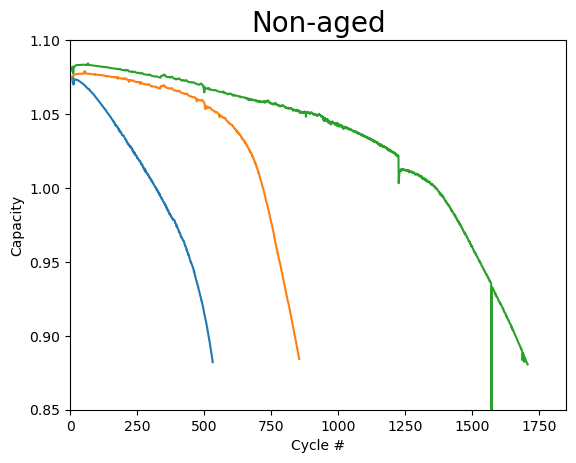

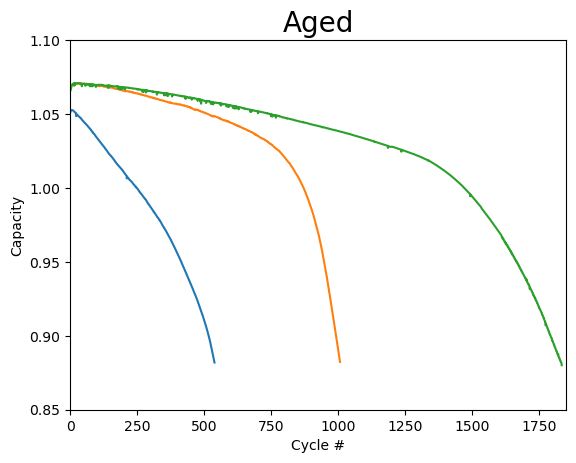

In [54]:
ageing = ["Non-aged",  "Aged"]
for i in range(2):
    fig, axes = plt.subplots()
    for j in range(3):
        lifetimes[i,j] = y[idxs[i,j]]
        chargies[i,j] = charge_policy[idxs[i,j],1]
        to_be_plotted = x[idxs[i,j], :y[idxs[i,j]]-2]
#         to_be
        axes.set_ylabel('Capacity')
        axes.set_xlabel('Cycle #')
        axes.plot(to_be_plotted)
        plt.ylim(0.85,1.1)
        plt.xlim(0, 1850)
    plt.title(ageing[i], fontsize =20)
    plt.savefig(str(ageing[i])  + ".png")

In [22]:
lifetimes = [ "0_short", "1_medium", "2_long"]
ageing = ["0_no_ageing",  "2_ageing"]
for i in range(2):
    for j in range(3):
        
        bat_indices = np.arange(y[idxs[i,j]])+1
        overpot = overpot_charge[idxs[i,j], :y[idxs[i,j]]]
        
        my_df= pd.DataFrame(np.stack([bat_indices, overpot]).T,


                           columns=['Cycle', 'Overpotential', ])
        my_df.to_csv(oj(result_path,"charge_"+str(lifetimes[j]) + "_lifetime_" + ageing[i] + '.csv'), index = False)